In [46]:
import networkx as nx
from pathlib import Path
import random
from networkx.algorithms.flow import preflow_push
import time
from algo.fifo_push_relabel import fifo_push_relabel_impl
from algo.edmonds_carp import edmonds_karp
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os


def get_input(file):
    p = file.readline()
    while p:
        params = tuple(map(int, p.split()))
        yield params
        p = file.readline()


In [47]:
INPUT_PARAMS_PATH = Path(os.path.join("datasets", "analyze", "input_params.txt"))
exec_time_fifo = []
exec_time_edmonds = []
with INPUT_PARAMS_PATH.open('r') as file:
    for params in get_input(file):
        g = nx.gnm_random_graph(params[0], params[1])
        for edge in g.edges():
            cap = random.randint(1, params[2])
            g[edge[0]][edge[1]]['capacity'] = cap
        r = preflow_push(nx.Graph(g), 0, params[0]-1, value_only=True)
        expected_result = r.graph["flow_value"]
        gr = nx.Graph(g)
        start_time=time.perf_counter()
        result = fifo_push_relabel_impl(gr,0,params[0]-1)
        finish_time=time.perf_counter()
        exec_time_fifo.append(finish_time-start_time)
        gr = nx.Graph(g)
        start_time=time.perf_counter()
        result = edmonds_karp(gr,0,params[0]-1)
        finish_time=time.perf_counter()
        exec_time_edmonds.append(finish_time-start_time)
        assert expected_result == result

In [48]:
max_time_fifo = [max(exec_time_fifo[i*50:(i+1)*50]) for i in range(5)]
avg_time_fifo = [statistics.mean(exec_time_fifo[i*50:(i+1)*50]) for i in range(5)]
max_time_edmonds = [max(exec_time_edmonds[i*50:(i+1)*50]) for i in range(5)]
avg_time_edmonds = [statistics.mean(exec_time_edmonds[i*50:(i+1)*50]) for i in range(5)]

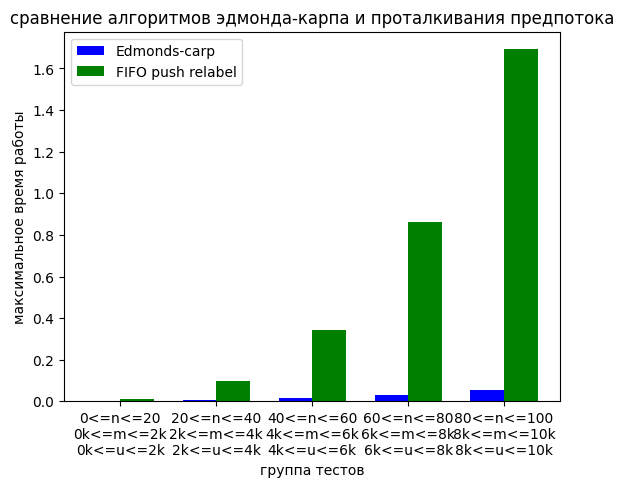

In [49]:
test_groups = [f"{i*20}<=n<={(i+1)*20}\n{i*2}k<=m<={(i+1)*2}k\n{i*2}k<=u<={(i+1)*2}k" for i in range(5)]

x = np.arange(len(test_groups))

width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, max_time_edmonds, width, label='Edmonds-carp', color='b')
rects2 = ax.bar(x + width/2, max_time_fifo, width, label='FIFO push relabel', color='g')

ax.set_xlabel('группа тестов')
ax.set_ylabel('максимальное время работы')
ax.set_title('сравнение алгоритмов эдмонда-карпа и проталкивания предпотока')
ax.set_xticks(x)
ax.set_xticklabels(test_groups)
ax.legend()
plt.show()


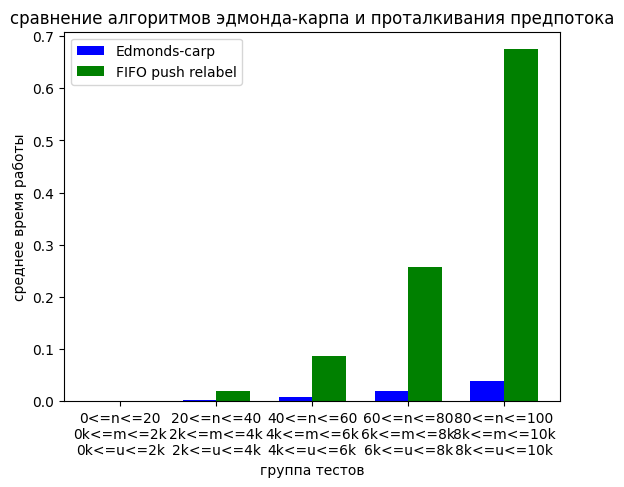

In [50]:
test_groups = [f"{i*20}<=n<={(i+1)*20}\n{i*2}k<=m<={(i+1)*2}k\n{i*2}k<=u<={(i+1)*2}k" for i in range(5)]

x = np.arange(len(test_groups))

width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, avg_time_edmonds, width, label='Edmonds-carp', color='b')
rects2 = ax.bar(x + width/2, avg_time_fifo, width, label='FIFO push relabel', color='g')

ax.set_xlabel('группа тестов')
ax.set_ylabel('среднее время работы')
ax.set_title('сравнение алгоритмов эдмонда-карпа и проталкивания предпотока')
ax.set_xticks(x)
ax.set_xticklabels(test_groups)
ax.legend()
plt.show()
